# Métodos de integración numérica por cuadratura

Ejercicio 1 de la sección 4.6.6

In [1]:
import numpy as np
from scipy import integrate
import scipy.special as sc
import matplotlib.pyplot as plt
import pandas as pd
import math 
import sympy as sym
from sympy import *
from sympy import Integral, sin, sqrt
from sympy.integrals.quadrature import gauss_legendre

In [2]:
X = Symbol('x')

In [3]:
Int = sym.integrate(sym.cos(X**2 + 4), X)
Int

sqrt(2)*sqrt(pi)*(cos(4)*fresnelc(sqrt(2)*x/sqrt(pi)) - sin(4)*fresnels(sqrt(2)*x/sqrt(pi)))/2

## Visualización de la función a integrar

In [4]:
xx = np.linspace(0, 10, 1000)
S, C = sc.fresnel(math.sqrt(2) * math.pi ** (-0.1e1 / 0.2e1) * xx)
#S y C son las integrales de Fresnel
cg = math.sqrt(2) * math.sqrt(math.pi) * (math.cos(4) * C - math.sin(4) * S) / 2
#Resultado de la integral del libro

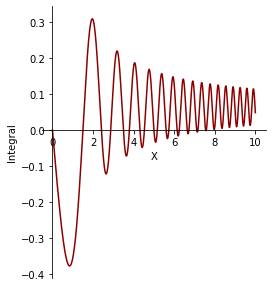

In [5]:
fig, (ax) = plt.subplots(1, figsize=(4,5))
ax.plot(xx, cg, color='darkred')
ax.set_xlabel("X")
ax.set_ylabel("Integral")

# set the x-spine
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.show()

# Evaluar la integral análitica

In [6]:
# Valor de la integral en (0,10)
sym.integrate(sym.cos(X**2 + 4), (X, 0, 10)).evalf()

0.0488019511115954

# Evaluar por regla de Simpson 1000

In [7]:
def f(x):
    return (sym.cos(x**2 + 4))
    
    
def ReglaSimpson(limite_inferior,limite_superior,n):
    c = (limite_superior - limite_inferior) / n
    integral = f(limite_inferior) + f(limite_superior)
    for a in range(1,n):
        k = limite_inferior + a*c
        if (a%2 == 0):
            integral = integral + 2 * f(k)
        else:
            integral = integral + 4 * f(k)
    integral = integral * c/3
    return integral

# Para esta cuadratura se tuvo que hacer con un intervalo grande de 1000 para obtener un resultado parecido al original.
resultado = (ReglaSimpson (0,10,1000))
resultado_simp = sym.simplify (resultado).evalf()
print (resultado_simp)

0.0488018138985559


# Evaluar por regla de Trapecios 1000

In [8]:
t = Integral(sym.cos(X**2 + 4), (X, 0, 10))
t.as_sum(1000, 'trapezoid').evalf()

0.0488555890321999

# Evaluar por regla de Gauss-Legendre 

In [22]:
t, c = gauss_legendre(50, 10)
sumar = []
for n in range(len(c)):
    II =  c[n] * math.cos((5*t[n] + 5)**2 + 4)
    sumar.append(II)
answ = 0 
for i in range(len(sumar)):
    answ = answ + sumar[i]
    
answ*5

0.0488019156546490